In [1]:
#How to properly evaluate Classification Models
#What is the purpose of model evaluation, and what are common evaluation procedures
#What is the usage of classification accuracy and what are some limitations
#How does a confusion matrix describe the performance of a classifier
#What metrics can be computed from a confusion matrix
#How can you adjust classifier performance by Changing classification threshold
#What is the purpose of ROC
#How does AUC area under curve differ from classification accuracy

In [2]:
#Briefly review of model evaluation
#Model Evaluation answers: how do i choose between different models
#between k nearest and logistic regression
#or selecting optimal tunning paramters
#or choosing different sets of features
#you need a Model Evaluation Procedure to estimate how well a model will generalize to out of sample data
#Requires a model evaluation metric to quantify the model performance

#We have talked different types of Model Evaluation Procedures
#Training and Testing on same data
    #Rewards overly complex models that overfit the training data and wont necessarily generalize
#Train/Test split
    #better estimate out of sample perfromance but still a high variance estimate
    #useful due to its speed, simplicity and flexibility    
#K Fold Cross Validation
    #Systematically create K train test splits and average the results together
    #Even better estimate of out of sample performance
    #Runs k times slower than train/test split
    #training and testing on same data is classical cause of over fitting, in which you over built complex model
        #that will not generalize to new data
    #train/test is still better than k fold cross validation due to its speed
    
    
#You always need Evaluation Metrics
    #Regression Problems: Mean Absolute Error, Mean Squared Error, Root Mean Squared Error
    #Classification Problems: Classifcation Accuracy
    

#Classification Accuracy, its strengths and accuracy
    



In [1]:
import pandas as pd
pima = pd.read_csv('/Users/riteshtripathi/Downloads/data.csv')
pima.head()


#url = 'https://arch....'
#col_names = ['pregnant', ...]
#pima = pd.re..(url, header = None, names = col_names)

#we are to find diabets for a paitent if given health details

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
#Qns: Can we predicit the diabetes status of a patient given their health measurements
#choosing X features
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']
y = pima.Outcome
X = pima[feature_cols]

In [3]:
#Split X and y into training and testing data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)


In [4]:
#train a logistic regression model on training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'lbfgs')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
#make predictions for testing set
y_pred_class = logreg.predict(X_test)

In [6]:
#Calculation Accuracy: Percent of correct prediction
#Calculate Accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))
#here y_test contains true response values

0.6770833333333334


In [15]:
#Null Accuracy: Accuracy that could be achieved by always predicting the most frequent class
#any time u use classification accuracy, its better to use compare with null accuracy

#examine the class distribution of the testing set, using pandas series
y_test.value_counts()

0    130
1     62
Name: Outcome, dtype: int64

In [16]:
#Calculate the percentage of ones
y_test.mean()
#32 percent of y_test are ones

0.3229166666666667

In [17]:
#Calculate percent of zeros
1 - y_test.mean()

0.6770833333333333

In [18]:
#Since 67 is larger than 32, we would say 67 is the Null Accuracy
#a dumb model predicts that a paitent doesnt have diabetes will be 67 percent of times
#when we compare null accuracy with model accuracy
    #this shows our model is not good, 67 comparing with 69
#this tells us one weakness of classification accuracy
    #classification accuracy doesnt tell us anything about underlying distribution of the testing set

#How to calcualte Null Accuracy in one go:(for binary classification problems coded as 0 and 1)
max(y_test.mean(), 1 - y_test.mean())
    

0.6770833333333333

In [19]:
#Calculate Null Accuracy for multi class classification problems(for 3 or more classes)
#they will only work if y_test is pandas series
y_test.value_counts().head(1) / len(y_test)

0    0.677083
Name: Outcome, dtype: float64

In [20]:
#lets look at another weakness of classification accuracy
#Comparing True and Predicted Response
#print the first 25 true and predicted responses
print('True: ', y_test.values[0:25])
print('Pred: ', y_pred_class[0:25])

#the problem we see is that
#when true is always 0, it predicts as 0
#when true is 1, pred is rarely 1

True:  [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred:  [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
#Conclusion
#Classification accuracy is the easiest classification metric to understand
#but it doesnt tell you the underlying distribution of response values
#And it doesnt tell you that what types of errors your classifier is making


In [21]:
#To over come all the issues in Classification Accuracy, We use Confusion MAtrix
#Confusion Matrix: Table that describes the performance of a classifcation model

#Important: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred_class))
#here true values = y_test
#here predicted values = y_pred_class
#adapt to this habbit

#this is a 2*2 matrix, because its a binary classification
#it there were 5 classes, it would be 5*5

[[114  16]
 [ 46  16]]


In [24]:
#above doesnt tells us anything, lets use diagram to explain
![small confusion matrix](images/09_confusion_matrix_1.png)

/bin/sh: -c: line 0: syntax error near unexpected token `('
/bin/sh: -c: line 0: `[small confusion matrix](images/09_confusion_matrix_1.png)'


In [ ]:
#It shows
#When actual 0:it predicted 0 114 times
#When actual 0: it predicted 1, 16 times

#When Actual 1: it predicted 0's, 47 times
#When Actual 1: it predicted 1's, 15 times

In [ ]:
#When a confusion matrix is used for a binary problem
#True Positives: we correctly predicited that they do have diabetes
    #in this case, classifier correctly predicted 16 cases, patients have diabetes
#True Negatives: We correctly predicted that they dont have diabtes
    #classifier predicted, 114 cases,  patients do not have diabetes
#False Positives: We incorrectly predicted that they do have diabetes, Type 1 error
    #In 12 cases, classifier incorrectly predicted that a patient has diabetes and yet they do not
#False Negatives: We incorrectly predicted that they dont have diabetes, Type 2 error
    #classifier incorrectly predicted 46 cases, that a patient doesnt have diabetes, but infact they do have diabetes
    

#its conventional, class coded as 0 as -ve class
#class coded as 1 as +ve class
#therefore correctly predicting 1 values is True Positives
#Correctly predicitng as 0 values is True Negatives


In [ ]:
#Metrics Computed from a Confusion Matrix
#Classification Accuracy: Over all how often is the classifier correct?
#Classification Accuracy can be calculated from COnfusion Matrix
print(metrics.accuracy_score(y_test, y_pred_class))

In [ ]:
#Classification Error: Over all how often is the classifier incorrect
print(1 - metrics.accuracy_score(y_test, y_pred_class)

In [ ]:
#Senstivity
#When the actual value is positive, how often is the prediction correct?
#Also known as True Positive Rate or Recall
    #How senstive is the classifier to detecting poisitve instances
print(metrics.recall_score(y_test, y_pred_class))


In [ ]:
#Specificity
#When the actual value is negative, how often is the predicition correct
    #How specific (or selective)is the classifier in predicting positive instances
#no per formula in scikit learn, we have to calcualte manually
TN / float(TN + FP)

In [ ]:
#False Positive Rate
#When the actual value is negative, how often is the prediction incorrect
FP / float(TN + FP)


In [ ]:
#Precision
#When a positive value is predicted, how often is prediction correct
    #How precise is the classifier when predicting positive instances?
TP / float(TP + FP)
print(metrics.precision_score(y_test, y_pred_class))


In [ ]:
#Many other metrics can be computed: F1 SCore, Mathews Corelation coefficient etc


In [ ]:
#Conclusion
#Confusion metrix gives you a more complete picture of how your classifier is performing
#Also allows you to compute various classification metrics and these metrics can guide your model selection


In [ ]:
#Which metrics should you focus on?
#Choice of metrics depends on business objective
#Spam Filter: positive class is spam, Optimize your precision or specificity because false negatives (spam goes to inbox)
    #are more acceptable than false positives (non spam is caught by the spam filter)    
#Fradulent Transaction Detector(positive class is fraud): Optimize for senstivity because false positives 
    #(normal transactions that are flagged as possible fraud) are more acceptable than false negatives
    #(fraudlent transactions are not detected)

In [7]:
#Adjusting the classification thresholds
#How to modify the performance of a classifier by adjusting the classification threshold
#print the first 10 predicted responses
logreg.predict(X_test)[0:10]
#its a one dimensional array of 0's and 1's

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [8]:
#print the first 10 predicted probabilites of class membership
logreg.predict_proba(X_test)[0:10, :]
#here each row represnts one observation
#each column represents paritcular class

#col on left is col 0 and right is 1
#shows us the probability of eeach observation is of class 0
#same for class1
#each row adds upto 1

#why we do this step, is to see the probability of someone having a probability of getting diabetes and to contact them


array([[0.61405867, 0.38594133],
       [0.7505398 , 0.2494602 ],
       [0.74167648, 0.25832352],
       [0.60291327, 0.39708673],
       [0.88426611, 0.11573389],
       [0.87695895, 0.12304105],
       [0.50819992, 0.49180008],
       [0.44582289, 0.55417711],
       [0.77950769, 0.22049231],
       [0.25853303, 0.74146697]])

In [9]:
#print the first 10 predicted probabilites for class 1 (we are isolating pred prob)
logreg.predict_proba(X_test)[0:10, 1]

array([0.38594133, 0.2494602 , 0.25832352, 0.39708673, 0.11573389,
       0.12304105, 0.49180008, 0.55417711, 0.22049231, 0.74146697])

In [10]:
#store above predicted probs for class1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]#i want all the rows

In [11]:
#Now we are going to plot histogram of these probabilites of class1
#to help demonstarte how adjusting the classification threshold can impact the performance of the model
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14


Text(0, 0.5, 'Frequency')

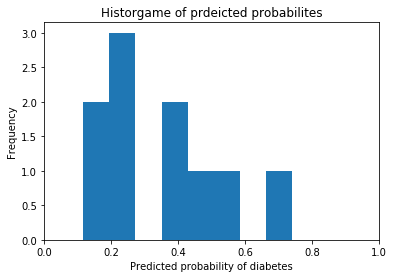

In [12]:
#histogram of predicted probabilites
plt.hist(y_pred_prob, bins = 8)
plt.xlim(0, 1)
plt.title('Historgame of prdeicted probabilites')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

#histogram shows the distribution of numerical variables

In [ ]:
#2nd bar shows that, 30 percent of observations had values between 0.2 and 0.3
#class1 is rarely predicted since small minority of testing setup observations had predicted probability above 
#the threshold
#you can adjust the senstivity and specificity by adjustting the threshold
#For Eg, if we decreasee the threshold for predicting diabetes in order to increase the senstivity of the classifier


In [14]:
#there was an explanation on above for lowering the threshold, i skipped that
#lets lower the threshold from 0.5 to 0.3
#predict diabetes if the predicted probability is greater than 0.3

from sklearn.preprocessing import binarize
y_pred_class = binarize(y_pred_prob, 0.3)[0]

#it will return 1 for all above class 0.3 and 0 otherwise


ValueError: Expected 2D array, got 1D array instead:
array=[0.38594133 0.2494602  0.25832352 0.39708673 0.11573389 0.12304105
 0.49180008 0.55417711 0.22049231 0.74146697].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [15]:
#print the first 10 predicted probabilites
y_pred_prob[0:10]

array([0.38594133, 0.2494602 , 0.25832352, 0.39708673, 0.11573389,
       0.12304105, 0.49180008, 0.55417711, 0.22049231, 0.74146697])

In [16]:
#print the first 10 predicted classes with lower threshold
y_pred_class[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [20]:
#previous confusion matrix default to 0.5
print(confusion)

NameError: name 'confusion' is not defined

In [ ]:
118 12
47 15

is the confusion result

In [18]:
#new confusion metrics for 0.3 threshild
print(metrics.confusion_matrix(y_test, y_pred_class))

[[114  16]
 [ 46  16]]


In [21]:
#senstivity has increased (used to be 0.24)
print(46/float(46+16))


0.7419354838709677


In [22]:
#specifity has decreased (used to be 0.91)
print(80/float(80+50))

#this happened, because most of the observations moved from class 0 to class 1
#that guarantees number of false positives will increase
#and true negatives will decrease
#which decreases the specificity



0.6153846153846154


In [ ]:
#Conclusion
#threshold 0.5 is used by default (for binary problems) to convert predicted probabilites into class predictions
#threshold can be adjusted to increase senstivity or specificity depending on your business objectives
#Sensitivity and Specificity have an inverse relationship
#increasing one will always decrease the other

#remember that adjusting should the last step of building model
#most of the time should be selecting best model

In [ ]:
#ROC and Area under the curve (AUC)
#we have been seeing differernt threshold, it would be better if we could see how senstivity and specificity
#are affected by various threshold, without actually changing the threshold

#Ans: plot the roc curve


In [23]:
#first argument is true values, second argument is predicted probabilites
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROc curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Speciifty)')
plt.ylabel('True Positive Rate (Sensititvity)')
plt.grid(True)

ValueError: Found input variables with inconsistent numbers of samples: [192, 10]

In [ ]:
#ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way
#that makes sense for your particular context

#You cant actually see the threshold used to generate the curve on the ROC curve itself

#the plot roc tells u that if you want to achieve sensitivity of 0.9, you should choose specifity of 0.4
#above, i couldnt get the roc curve, but using answers from prof class
#from roc, the top most left corner shows high sensitvity and specificity 
#it can visually help you to choose threshold, that makes sense to your problem



In [25]:
#define a function that accepts a threshold and prints sensitivity and specificty
def evaluate_threshold(threshold):
    print('Senstivity:', tpr[thresholds > threshold][-1],
    print('Specificity:', fpr[thresholds > threshold][-1]))

In [26]:
evaluate_threshold(0.5)
#the graph generated 
#Sens: 0.24
#Spe: 0.91

NameError: name 'tpr' is not defined

In [ ]:
evaluate_threshold(0.3)
##sens: 0.74
#spec: 0.61

#remember: roc curve is a plot of senstivity vs 1-speciificity for all clasification threshold from 0 to 1


In [27]:
#AUC
#the area under the curve, in this case its big auc
#auc is used as a single number summary of the performance of the classifier
#to alternative to classification accuracy

#AUC is the percentage of the ROC plot that is underneath the curve
#first argument is true values, second argument is predicted probabliites
print(metrics.roc_auc_score(y_test, y_pred_prob))

ValueError: Found input variables with inconsistent numbers of samples: [192, 10]

In [ ]:
#this gives 0.72, 
#best auc for any classifier is 1


In [ ]:
#AUC is useful as a single number summary of classifier performance
#if you randomly choose one positive and one negative observations, AUC represnts the likelihood that your classifier 
#will assign a higher preidcited probability to the positive observation

#AuC is useful even when there is high class imbalance(unlike classification accuracy)
#auc is better than classification accuracy


In [33]:
#Claculate Cross Validate AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv = 10, scoring = 'roc_auc').mean()

0.7425071225071225

In [ ]:
#Confusion Matrix Advantage
#Allows you to calculate a variety of metrics
#USeful for multi class problems(more than two response classes)



In [ ]:
#ROC / AUC advantages
#Does not require you to set a classification threshold
#still useful when there is high class imbalance

#Howevre they are less interpretable than the confusin matrix


In [ ]:
#try to use both, confusion matrix and roc/auc
#in confusion matrix many metrics can be caluclated